# g-h Filter

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import kf_book.book_plots as book_plots
from kf_book.book_plots import plot_errorbars
from kf_book.book_plots import figsize
import matplotlib.pyplot as plt

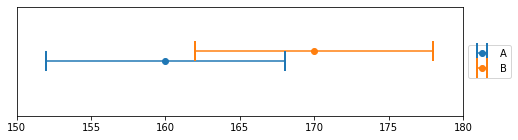

In [2]:
plot_errorbars([(160, 8, 'A'), (170, 8, 'B')], xlims = (150, 180))

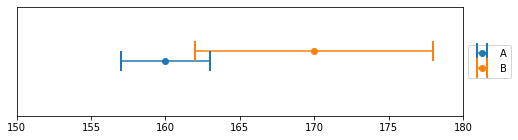

In [3]:
plot_errorbars([(160, 3, 'A'), (170, 8, 'B')], xlims = (150, 180))

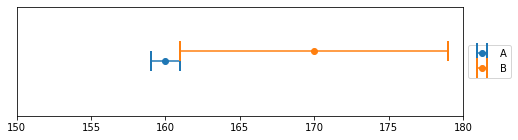

In [4]:
plot_errorbars([(160, 1, 'A'), (170, 9, 'B')], xlims = (150, 180))

In [5]:
measurements = np.random.uniform(160, 170, size = 10000)
mean = measurements.mean()
print('Average of measurements if {:.4f}'.format(mean))

Average of measurements if 165.0047


In [6]:
mean = np.random.normal(165, 5, size = 10000).mean()
print('Average of measurements if {:.4f}'.format(mean))

Average of measurements if 165.0283


In [7]:
import kf_book.gh_internal as gh

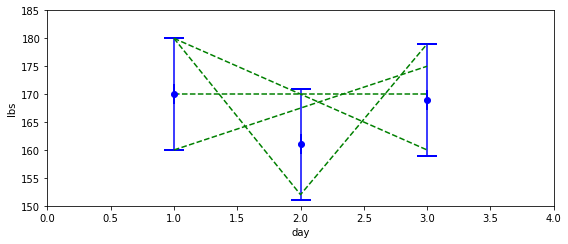

In [8]:
gh.plot_hypothesis1()

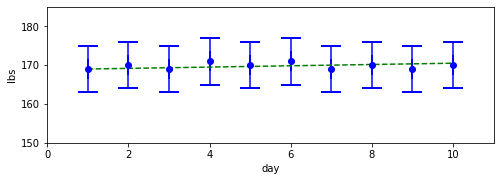

In [9]:
gh.plot_hypothesis2()

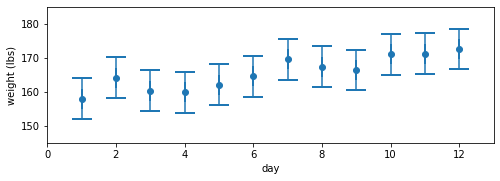

In [10]:
gh.plot_hypothesis3()

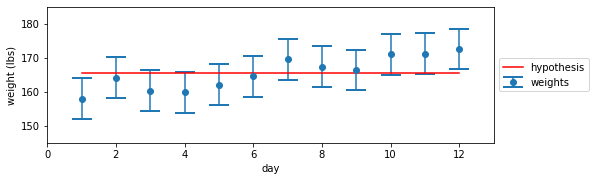

In [11]:
gh.plot_hypothesis4()

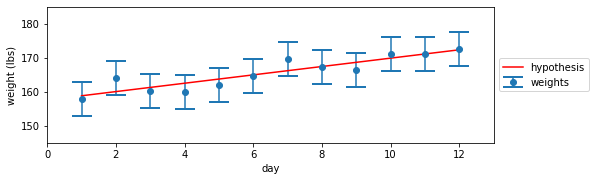

In [12]:
gh.plot_hypothesis5()

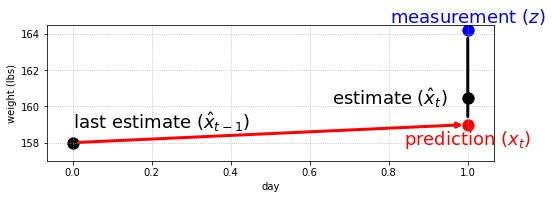

In [13]:
gh.plot_estimate_chart_3()

In [14]:
weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1.0 # day
scale_factor = 4/10;

def predicte_using_gain_guess(weight, gain_rate, do_print = False):
    estimates, predictions = [weight], []
    i = 1;
    # z is measurement 
    for z in weights:
        prediction = weight + gain_rate * time_step
        
        weight = prediction + scale_factor * (z - prediction)
        
        estimates.append(weight)
        predictions.append(prediction)
        if do_print:
            gh.print_results(estimates, prediction , weight)
    return estimates, predictions

inital_guess = 160;
estimates, predictions = predicte_using_gain_guess(weight = inital_guess, gain_rate = 1, do_print = True)

previous estimate: 160.00, prediction: 161.00, estimate 159.80
previous estimate: 159.80, prediction: 160.80, estimate 162.16
previous estimate: 162.16, prediction: 163.16, estimate 162.02
previous estimate: 162.02, prediction: 163.02, estimate 161.77
previous estimate: 161.77, prediction: 162.77, estimate 162.50
previous estimate: 162.50, prediction: 163.50, estimate 163.94
previous estimate: 163.94, prediction: 164.94, estimate 166.80
previous estimate: 166.80, prediction: 167.80, estimate 167.64
previous estimate: 167.64, prediction: 168.64, estimate 167.75
previous estimate: 167.75, prediction: 168.75, estimate 169.65
previous estimate: 169.65, prediction: 170.65, estimate 170.87
previous estimate: 170.87, prediction: 171.87, estimate 172.16


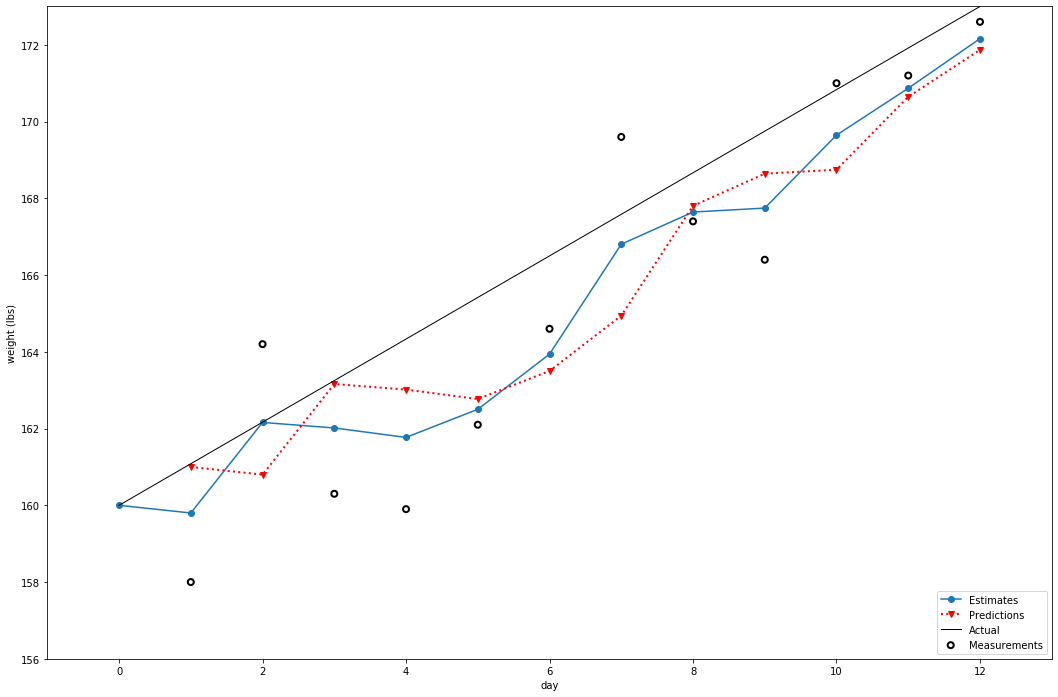

In [15]:
book_plots.set_figsize(18, 12)
gh.plot_gh_results(weights, estimates, predictions, [160, 173])

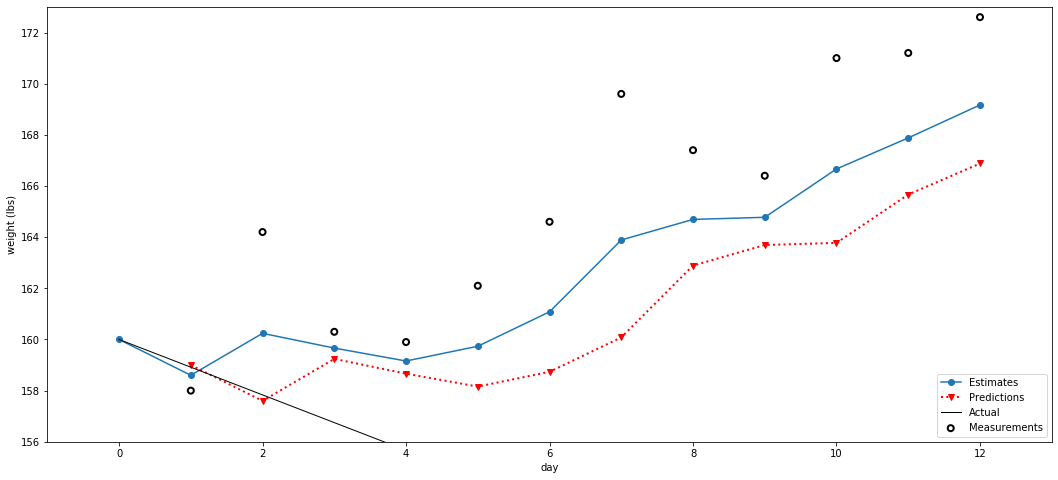

In [16]:
estimates, predictions = predicte_using_gain_guess(weight = inital_guess, gain_rate = -1)
book_plots.set_figsize(18, 8)
gh.plot_gh_results(weights, estimates, predictions, [160, 147])

[160, 158.6, 160.04, 160.73066666666668, 160.84151111111112, 161.47418074074074, 163.0623889382716, 166.52785087736623, 168.7511777483676, 169.23478128817925, 170.42001631600647, 171.4044852273673, 172.48700483172803]


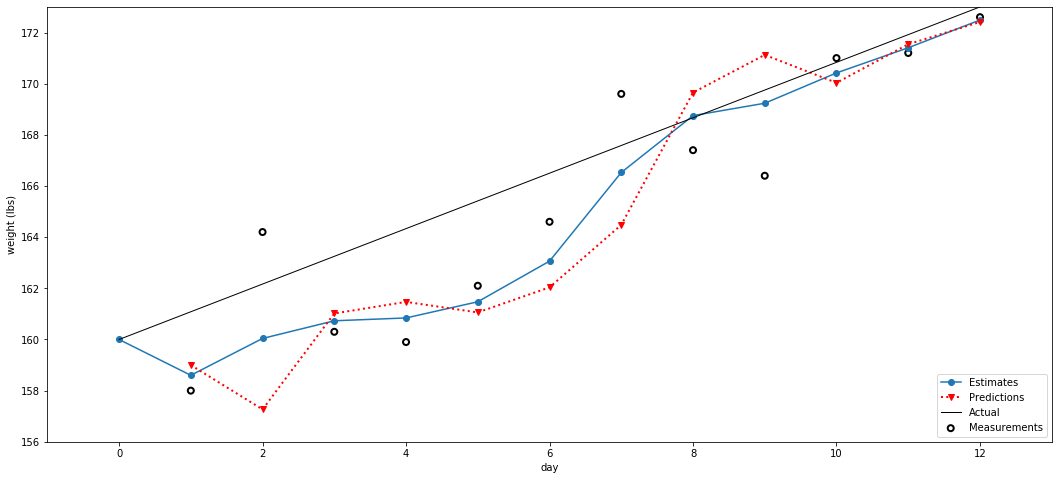

In [17]:
weight = 160
gain_rate = -1.0

time_step = 1
weight_scale = 0.4
gain_scale = 1/3
estimates = [weight]
predictions = []

for z in weights:
    # Prediction step
    weight = weight + gain_rate * time_step
    predictions.append(weight)
    
    # Update step
    residual = z - weight
    gain_rate = gain_rate + gain_scale * (residual/time_step)
    weight = weight + weight_scale * residual
    estimates.append(weight)
gh.plot_gh_results(weights, estimates, predictions, [160, 173])
print(estimates)


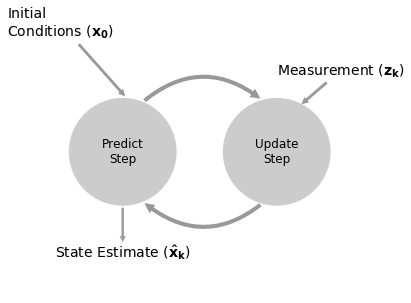

In [18]:
book_plots.predict_update_chart()

## Initalization
**1. Initialize the state of the filter.**

**2. Initialize our belief in the state.**

## Predict
**1. Use system behavior to predict state at the next time step**

**2. Adjust belief to account for the uncertainty in prediction**

## Update
**1. Get a measurement and associated belief about its accuracy.**

**2. Compute residual between estimated state and measurement.**

**3. New estimate is somewhere on the residual line.**

## Workflow
In one epoch:

$\Huge weight = weight + gain \quad rate \times time \quad step$

$\Huge residual = measurement - weight$

$\Huge gain rate = grain \quad rate + gain scale \times \frac{residual}{tiem \> step}$	

$\Huge weight = weight + weight \quad scale \times residual$

In [19]:
def g_h_filter(data, x0, dx, dt, g, h):
    '''
    data: contains the data to be filtered
    x0: the initial value for state variable
    dx: the initial change rate for state variable
    g: g-h scale factor
    h: g-h scale factor
    dt: the length of the time step
    '''
    x_est = x0
    results = []
    for z in data:
        x_pred = x_est + dx * dt
        
        residual = z - x_pred
        dx = dx + h * (residual/dt)
        x_est = x_pred + g * residual
        results.append(x_est)
    return results 

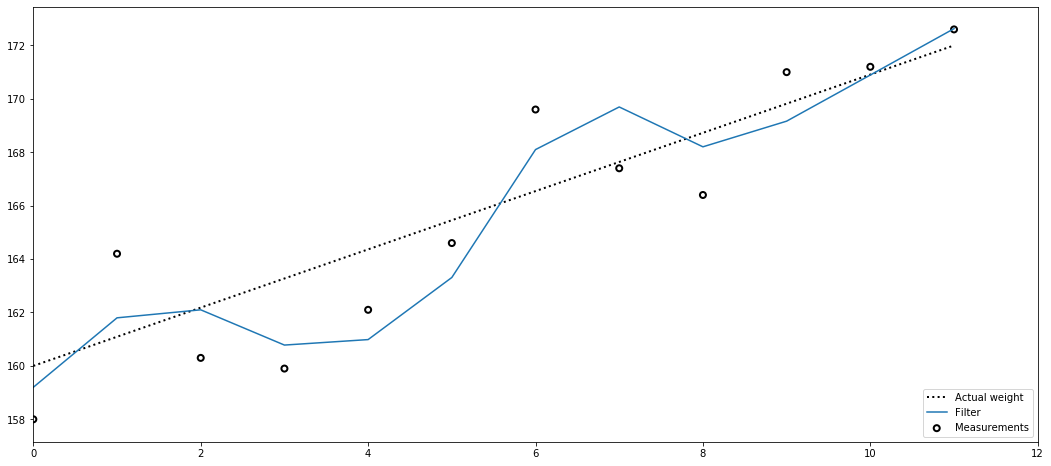

In [20]:
book_plots.plot_track([0, 11], [160, 172], label = 'Actual weight')
data = g_h_filter(data = weights, x0 = 160, dx = 1, dt = 1, g = 0.6, h = 2/3)
gh.plot_g_h_results(weights, data)

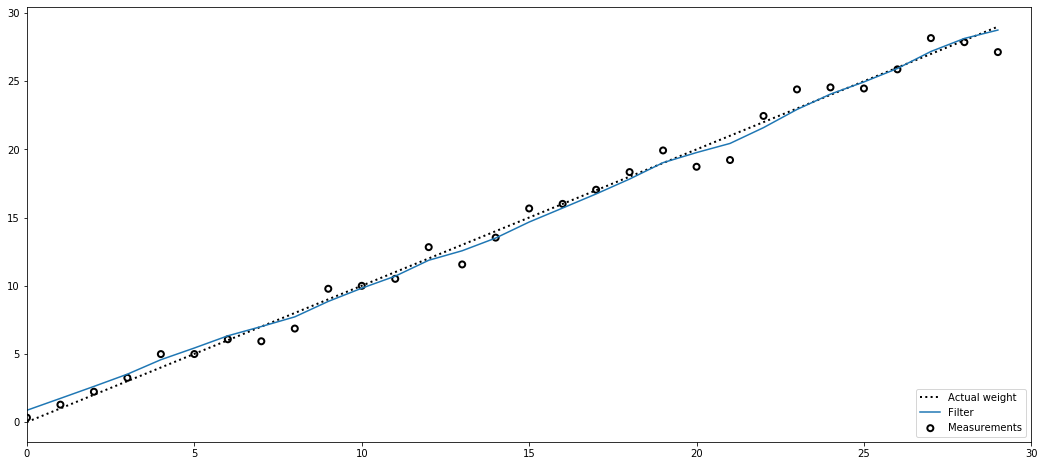

In [21]:
def gen_data(x0, dx, count, noise_factor):
    return [x0 + dx*i + np.random.randn() * noise_factor for i in range(count)]

measurements = gen_data(0, 1, 30, 1)
data_1 = g_h_filter(data = measurements, x0 = 0, dx = 1, dt = 1, g = 0.2, h = 0.02)
book_plots.plot_track([0, 29], [0, 29], label = 'Actual weight')
gh.plot_g_h_results(measurements, data_1)

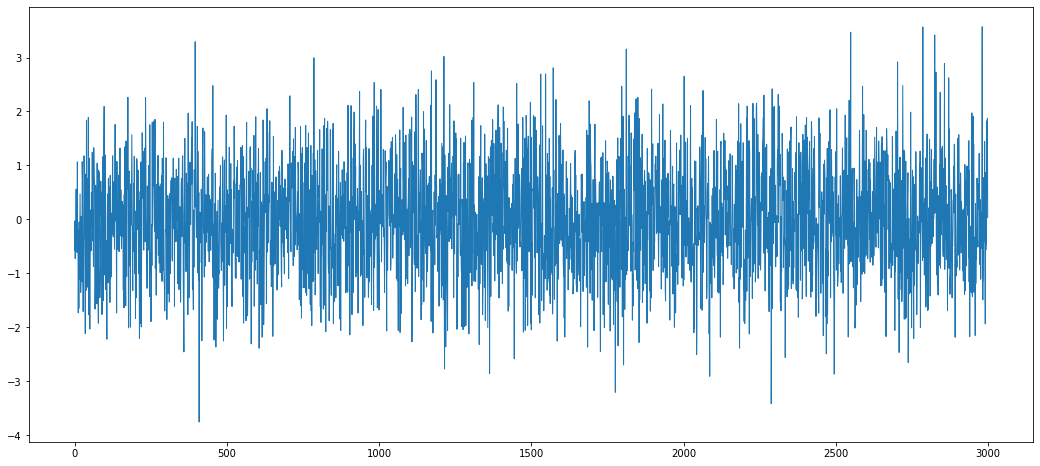

In [25]:
plt.plot([np.random.randn() for _ in range(3000)], lw = 1)

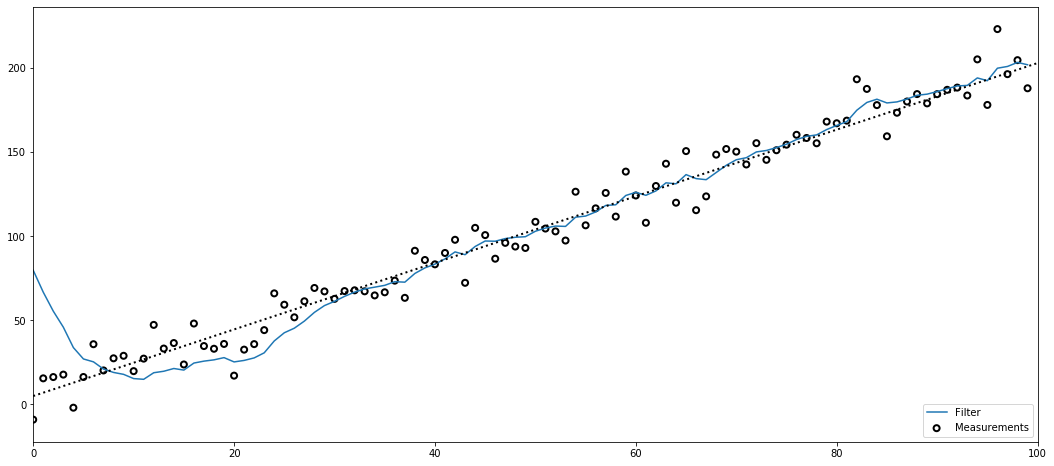

In [28]:
measurements = gen_data(x0 = 5, dx = 2, count = 100, noise_factor = 10)
data = g_h_filter(data = measurements, x0 = 100, dx=  2, dt = 1, g = 0.2, h = 0.02)
gh.plot_g_h_results(measurements = measurements, filtered_data = data)
book_plots.plot_track([0, 100], [5, 203], label = 'Actual weight')

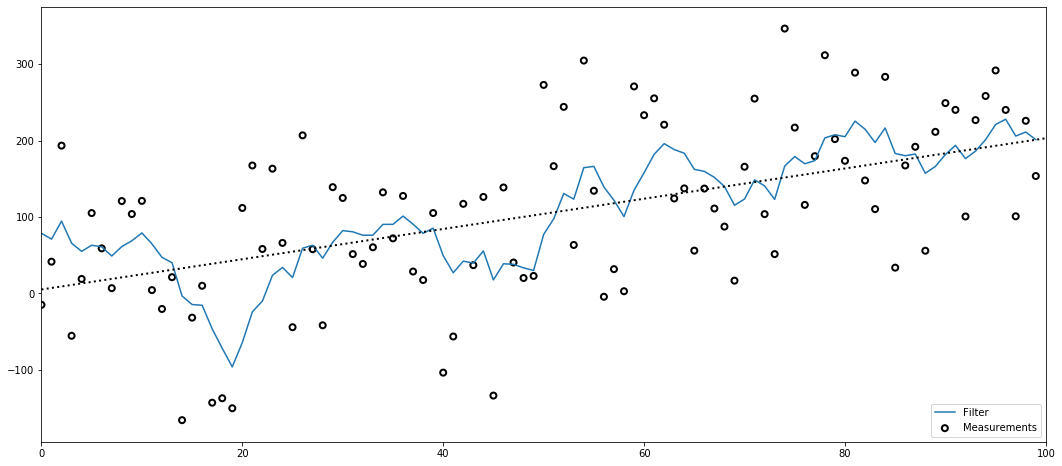

In [34]:
measurements = gen_data(x0 = 5, dx = 2, count = 100, noise_factor = 100)
data = g_h_filter(data = measurements, x0 = 100, dx=  2, dt = 1, g = 0.2, h = 0.02)
gh.plot_g_h_results(measurements = measurements, filtered_data = data)
book_plots.plot_track([0, 100], [5, 203], label = 'Actual weight')

In [37]:
def new_gen_data(x0, dx, count, noise_factor, accel = 0.):
    zs = []
    for i in range(count):
        zs.append(x0 + dx * i  + np.random.randn() * noise_factor)
        dx += accel
    return zs


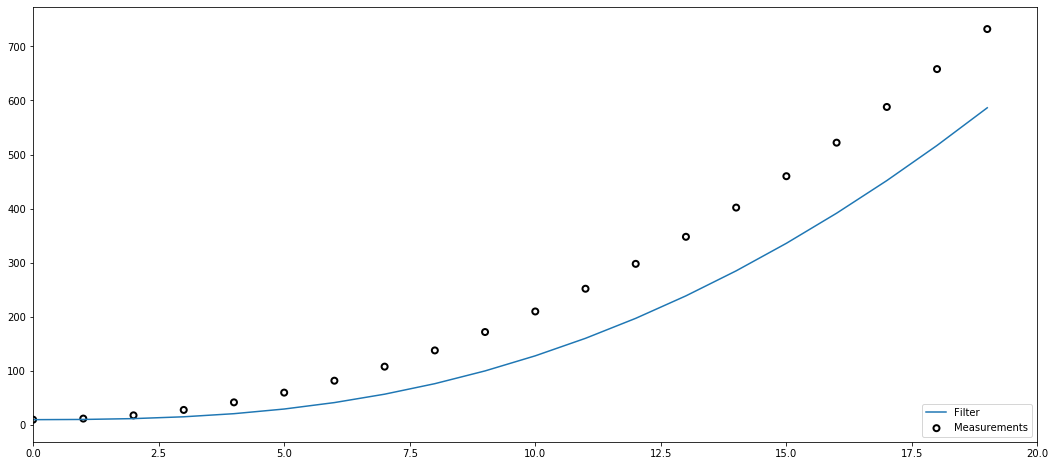

In [38]:
predictions = []
zs = new_gen_data(x0 = 10, dx = 0, count = 20, noise_factor = 0, accel = 2)
data = g_h_filter(data = zs, x0 = 10, dx=  0, dt = 1, g = 0.2, h = 0.02)
plt.xlim([0, 20])
gh.plot_g_h_results(measurements = zs, filtered_data = data)

# Exercise: Varying g

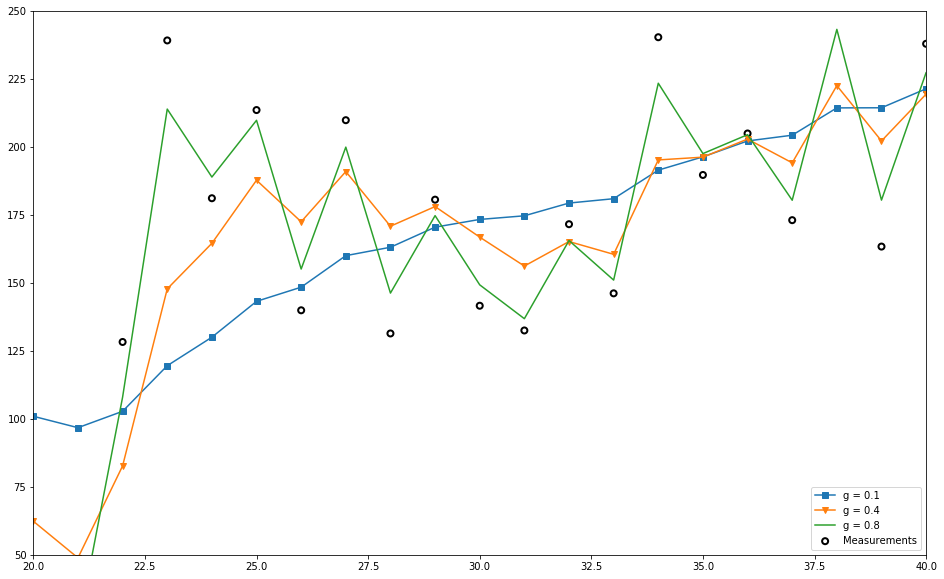

In [50]:
np.random.seed(10)
zs = gen_data(x0 = 5, dx = 5, count = 50, noise_factor = 50)
data1 = g_h_filter(data = zs, x0 = 0, dx = 5, dt = 1, g = 0.1, h = 0.01)
data2 = g_h_filter(data = zs, x0 = 0, dx = 5, dt = 1, g = 0.4, h = 0.01)
data3 = g_h_filter(data = zs, x0 = 0, dx = 5, dt = 1, g = 0.8, h = 0.01)

with book_plots.figsize(x = 16, y = 10):
    book_plots.plot_measurements(zs, color = 'k')
    book_plots.plot_filter(data1, label = 'g = 0.1', marker = 's', c = 'C0')
    book_plots.plot_filter(data2, label = 'g = 0.4', marker = 'v', c = 'C1')
    book_plots.plot_filter(data3, label = 'g = 0.8', c = 'C2')
    plt.legend(loc = 4)
    book_plots.set_limits([20, 40], [50, 250])

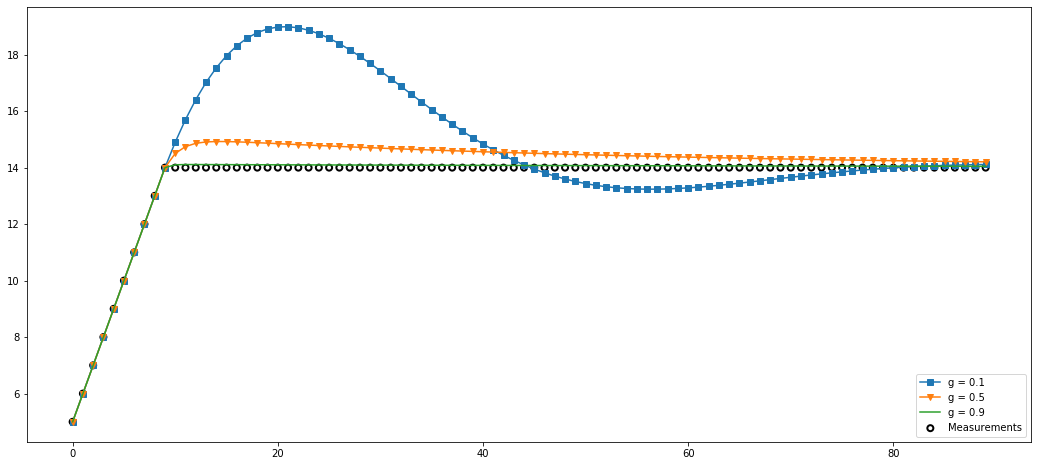

In [60]:
zs = [i for i in range(5, 15)]
for i in range(80):
    zs.append(14)
data1 = g_h_filter(data = zs, x0 = 4, dx = 1, dt = 1, g = 0.1, h = 0.01)
data2 = g_h_filter(data = zs, x0 = 4, dx = 1, dt = 1, g = 0.5, h = 0.01)
data3 = g_h_filter(data = zs, x0 = 4, dx = 1, dt = 1, g = 0.9, h = 0.01)

book_plots.plot_measurements(zs, color = 'k')
book_plots.plot_filter(data1, label = 'g = 0.1', marker = 's', c = 'C0')
book_plots.plot_filter(data2, label = 'g = 0.5', marker = 'v', c = 'C1')
book_plots.plot_filter(data3, label = 'g = 0.9', c = 'C2')
plt.legend(loc = 4)
# plt.ylim([6, 20]);

(6, 18)

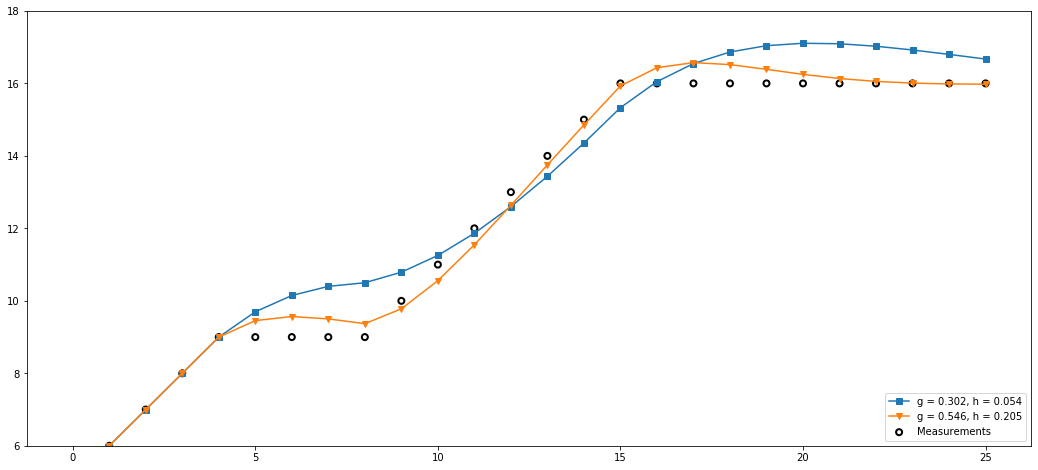

In [62]:
zs = [5, 6, 7, 8, 9, 9, 9, 9, 9, 10, 11, 12, 13, 14, 15]
for i in range(11):
    zs.append(16)

data1 = g_h_filter(data = zs, x0 = 4, dx = 1, dt = 1, g = 0.302, h = 0.054)
data2 = g_h_filter(data = zs, x0 = 4, dx = 1, dt = 1, g = 0.546, h = 0.205)

book_plots.plot_measurements(zs, color = 'k')
book_plots.plot_filter(data1, label = 'g = 0.302, h = 0.054', marker = 's', c = 'C0')
book_plots.plot_filter(data2, label = 'g = 0.546, h = 0.205', marker = 'v', c = 'C1')
plt.legend(loc = 4)
plt.ylim([6, 18])

# Exercise: Varying h

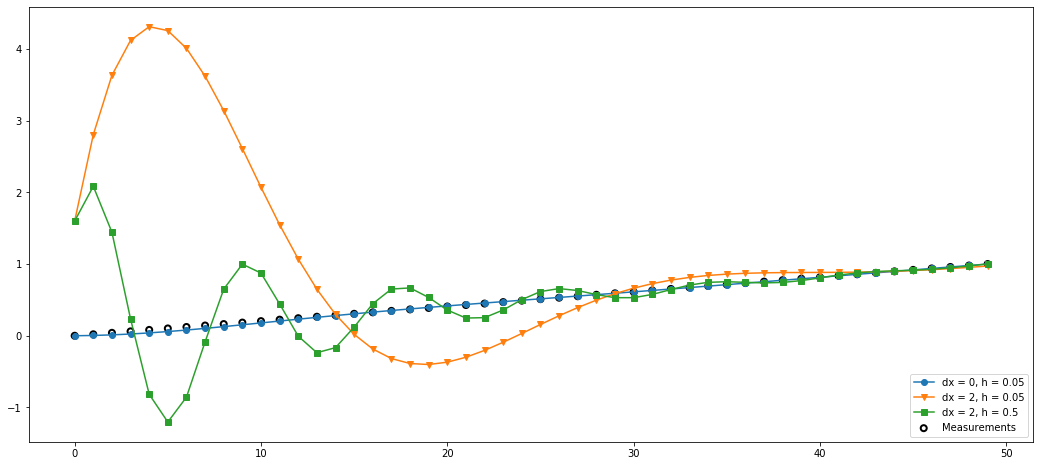

In [70]:
zs = np.linspace(0, 1, 50)

data1 = g_h_filter(data = zs, x0 = 0, dx = 0, dt = 1, g = 0.2, h = 0.05)
data2 = g_h_filter(data = zs, x0 = 0, dx = 2, dt = 1, g = 0.2, h = 0.05)
data3 = g_h_filter(data = zs, x0 = 0, dx = 2, dt = 1, g = 0.2, h = 0.5)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data1, label = 'dx = 0, h = 0.05', marker = 'o', c = 'C0')
book_plots.plot_filter(data2, label = 'dx = 2, h = 0.05', marker = 'v', c = 'C1')
book_plots.plot_filter(data3, label = 'dx = 2, h = 0.5', marker = 's', c = 'C2')

plt.legend(loc = 4)

# Interactive Example 

In [81]:
from ipywidgets import interact
from kf_book.book_plots import FloatSlider
zs1 = new_gen_data(x0 = 5, dx = 5, count = 100, noise_factor = 50)

fig = None
def interactive_gh(x, dx, g, h):
    global fig
    if fig is not None: plt.close(fig)
    fig = plt.figure()
    data = g_h_filter(data = zs1, x0 = x,dt = 1, dx = dx, g = g, h = h)
    plt.scatter(range(len(zs1)), zs1, edgecolor = 'k', facecolor = 'none', marker = 'o', lw = 1)
    plt.plot(data, color = 'b')
interact(interactive_gh,
        x = FloatSlider(value = 0, min = -200, max = 200),
        dx = FloatSlider(value = 5, min = -50, max = 50),
        g = FloatSlider(value = 0.1, min = 0.01, max = 2, step = 0.02),
        h = FloatSlider(value = 0.02, min = 0, max = 0.5, step = 0.01));

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='x', max=200.0, min=-200.0),…

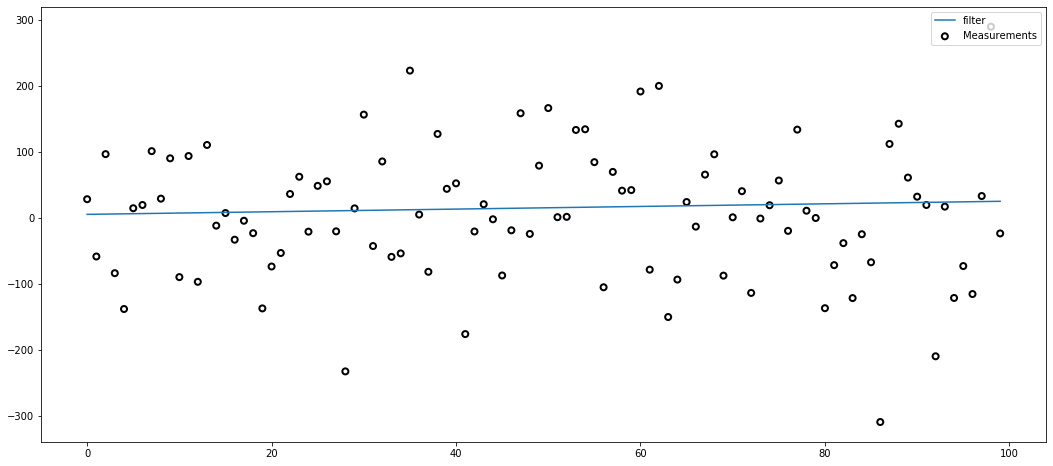

In [85]:
zs = gen_data(x0 = 5, dx = 0.2, count = 100, noise_factor = 100)
data = g_h_filter(data = zs, x0 = 5, dx = 0.2, dt = 1, g = 0, h = 0)
book_plots.plot_measurements(zs)
book_plots.plot_filter(data, label = 'filter')
plt.legend(loc = 1)

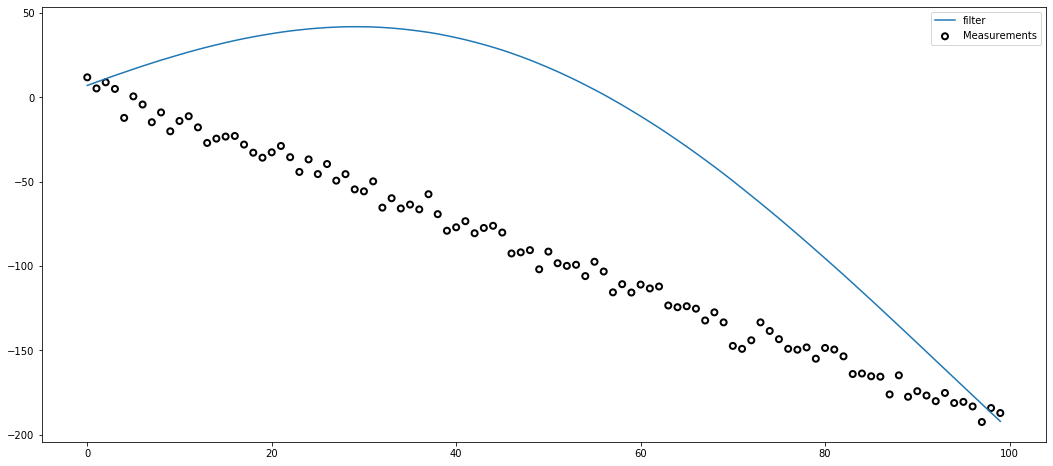

In [86]:
zs = gen_data(x0 = 5, dx = -2, count = 100, noise_factor = 5)
data = g_h_filter(data = zs, x0 = 5, dx = 2, dt = 1, g = 0.005, h = 0.001)
book_plots.plot_measurements(zs)
book_plots.plot_filter(data, label = 'filter')
plt.legend(loc = 1)

In [93]:
def compute_new_position(pos, vel, dt = 1):
    return pos + vel * dt

def measure_position(pos):
    return pos + np.random.randn() * 500

def gen_train_data(pos, vel, count):
    zs = []
    for i in range(count):
        pos = compute_new_position(pos, vel)
        zs.append(measure_position(pos))
    return np.asarray(zs)

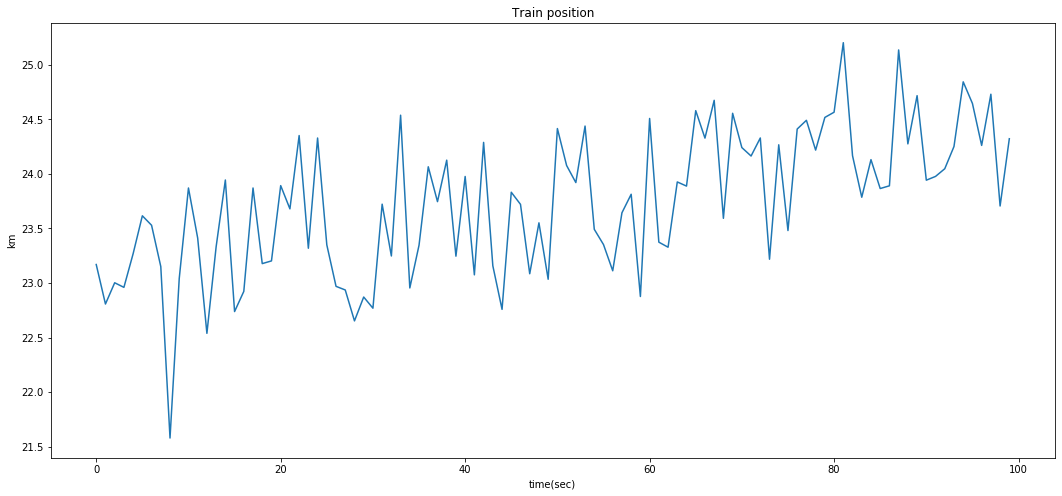

In [94]:
pos = 23 * 1000
vel = 15
zs = gen_train_data(pos, vel, count = 100)
plt.plot(zs/1000)
book_plots.set_labels('Train position', 'time(sec)', 'km')

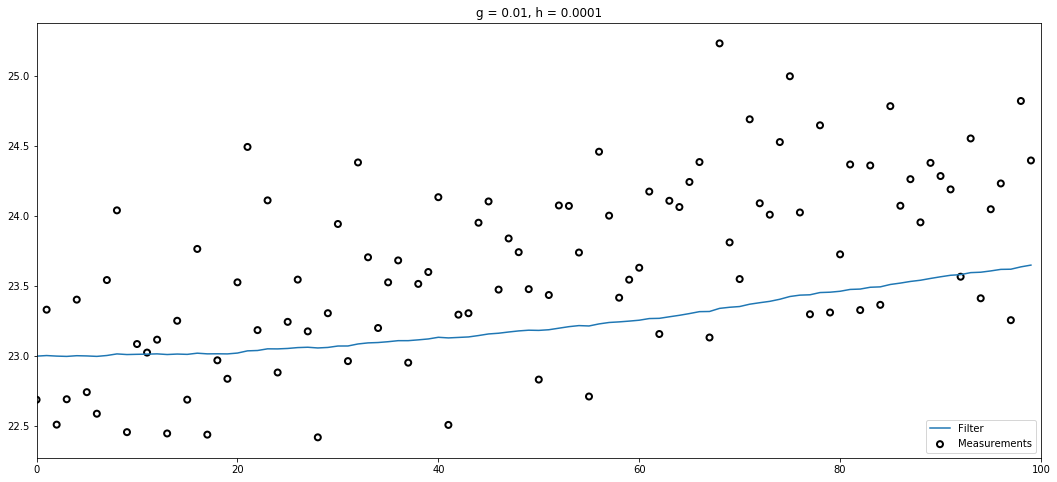

In [98]:
zs = gen_train_data(pos = pos, vel = vel, count = 100)

data = g_h_filter(data = zs, x0 = pos, dx = 1, dt = 1, g = 0.01, h = 0.0001)
gh.plot_g_h_results(zs/1000., np.asarray(data)/1000., 'g = 0.01, h = 0.0001')

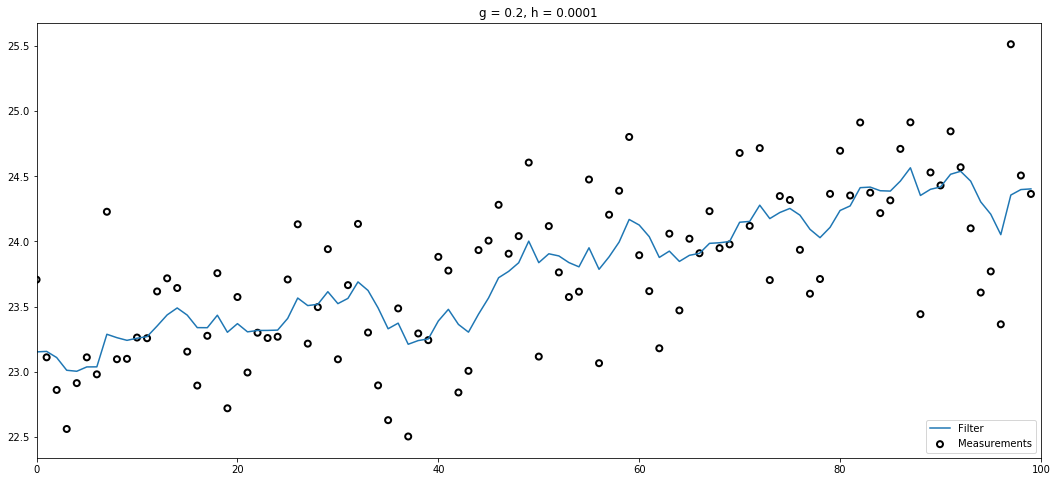

In [100]:
zs = gen_train_data(pos = pos, vel = 15, count = 100)

data = g_h_filter(data = zs, x0 = pos, dx = 15, dt = 1, g = 0.2, h = 0.0001)
gh.plot_g_h_results(zs/1000., np.asarray(data)/1000., 'g = 0.2, h = 0.0001')

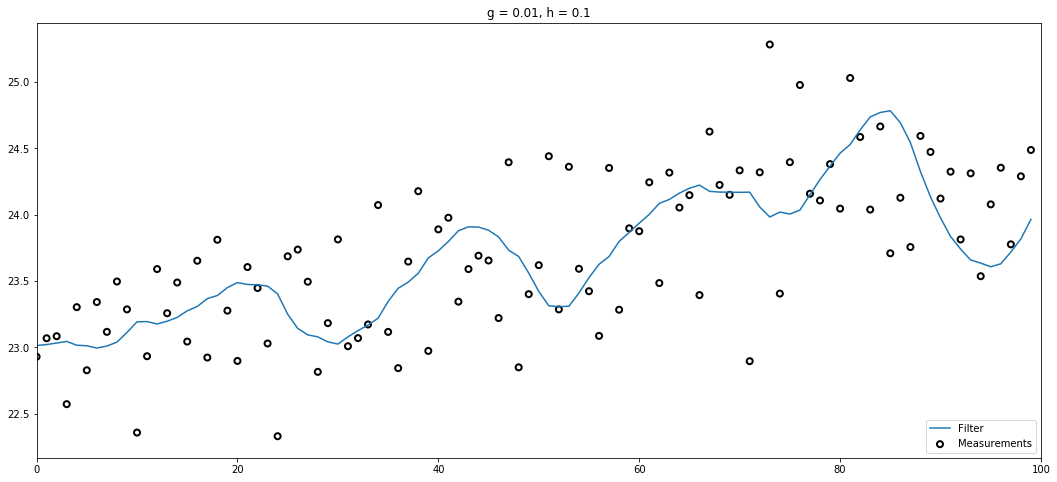

In [101]:
zs = gen_train_data(pos = pos, vel = 15, count = 100)

data = g_h_filter(data = zs, x0 = pos, dx = 15, dt = 1, g = 0.01, h = 0.1)
gh.plot_g_h_results(zs/1000., np.asarray(data)/1000., 'g = 0.01, h = 0.1')

In [102]:
def get_train_data_with_acc(pso, vel, count):
    zs = []
    for t in range(count):
        pos = compute_new_position(pos, vel)
        vel += 0.2
        zs.append(measure_position(pos))
    return np.asarray(zs)